In [1]:
import pandas as pd
import geopandas as gpd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
csv_path = r'D:\Projects\RO\DataChallenge2018\P_station\2.3 neerslag'
csv_ins = glob.glob('{}//*2015*.csv'.format(csv_path))
csv_ins

['D:\\Projects\\RO\\DataChallenge2018\\P_station\\2.3 neerslag\\LHA200-LHA230_2015_5minuten.csv',
 'D:\\Projects\\RO\\DataChallenge2018\\P_station\\2.3 neerslag\\LHA231-LHA260_2015_5minuten.csv',
 'D:\\Projects\\RO\\DataChallenge2018\\P_station\\2.3 neerslag\\LHA261-LHA316_2015_5minuten.csv',
 'D:\\Projects\\RO\\DataChallenge2018\\P_station\\2.3 neerslag\\LHA317-LHA346_2015_5minuten.csv']

In [3]:
gdf = gpd.read_file(r'D:\Projects\RO\DataChallenge2018\shape\peilvakken_WRSL_neerslag_mmWGS84.shp')
gdf.head()

,CODE,NAAM,SOORT,OPPERVLAK,TYPEBEHEER,ZOMERPEIL,WINTERPEIL,MIN_PEIL,MAX_PEIL,VASTPEIL,STREEFPEIL,STATUS,OPMERKING,ID,ID_1,som_pv,mm_30aug,geometry
0,LHA208-P,LHA208,onbekend,223433,seizoensgebonden,-1.00,-1.00,999.0,999.0,999.0,999.0,praktijk,"Praktijk ZP verlaagd met 0,50 m; WP verlaagd m...",0,0.0,0.000000,0.000,"POLYGON ((4.941920841001056 51.7969964522338, ..."
1,OOW103-P,OOW103,onbekend,1172819,seizoensgebonden,-0.50,-0.90,999.0,999.0,999.0,999.0,praktijk,Gecontroleerd SVA,1,1.0,9570.996902,95.710,"POLYGON ((4.903290701630984 51.79346047031316,..."
2,LHA245-P,LHA245,onbekend,319636,seizoensgebonden,-0.65,-0.85,999.0,999.0,999.0,999.0,praktijk,"Praktijk ZP met 0,15 verhoogd, WP met 0,20 ver...",2,2.0,8565.447602,85.654,"POLYGON ((5.01106176726913 51.78777180237206, ..."
3,LHA307-P,LHA307,onbekend,33821,seizoensgebonden,-0.15,0.10,999.0,999.0,999.0,999.0,praktijk,Gecontroleerd SVA,3,0.0,0.000000,0.000,"POLYGON ((5.045997492046079 51.76199457933275,..."
4,LHA242-P,LHA242,onbekend,193706,seizoensgebonden,-0.80,-0.80,999.0,999.0,999.0,999.0,praktijk,,4,4.0,8879.835731,88.798,"POLYGON ((5.036162631826241 51.78961435609716,..."


In [4]:
gdf_naam = []
for code_in in gdf['NAAM'].values:
#     if 'LHA' in code_in:
#         gdf_naam.append(code_in)
    gdf_naam.append(code_in)        
pv_code_ws = [x[-3::] for x in gdf_naam]

filter_code = []
for code in pv_code_ws:
    try:
        filter_code.append(int(code))
    except:
        continue

In [5]:
all_pv = np.array(filter_code)

In [6]:
df_all = pd.DataFrame()

In [7]:
for csv_in in csv_ins:

    # find peilvak selection in csv
    pv_start = int(os.path.basename(csv_in)[3:6])
    pv_end = int(os.path.basename(csv_in)[10:13])
    print(pv_start, pv_end)
    select_pv = ['LHA{}'.format(x) for x in all_pv[(all_pv >= pv_start) & (all_pv <= pv_end)]]
    
    # read csv
    df = pd.read_csv(csv_in, skiprows=2)#, index_col=[0,1,2])#, dtype=np.float64)
    df.index = pd.to_datetime(df['Eind'], dayfirst=True)
    df_sel = df[select_pv]
    df_sel = df_sel.resample('H').sum()
    
    df_sel = df_sel.loc[:,~df_sel.columns.duplicated()]
    df_all = pd.concat((df_all, df_sel))

200 230
231 260
261 316
317 346


In [8]:
df_precip = df_all.groupby(pd.TimeGrouper('H')).sum()

c:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [9]:
from_date = '2015-08-28 18:00'
to_date = '2015-09-02 08:00'
df_event = df_precip[from_date:to_date]

In [10]:
png_out = r'D:\Projects\RO\DataChallenge2018\png_out\precip'

In [11]:
sel_gdf = gdf[gdf['ID'].isin([92,74])]
sel_gdf.reset_index(drop=True, inplace=True)

In [12]:
sel_gdf.head()

,CODE,NAAM,SOORT,OPPERVLAK,TYPEBEHEER,ZOMERPEIL,WINTERPEIL,MIN_PEIL,MAX_PEIL,VASTPEIL,STREEFPEIL,STATUS,OPMERKING,ID,ID_1,som_pv,mm_30aug,geometry
0,LHA342-P,LHA342,onbekend,1427959,seizoensgebonden,0.2,0.1,999.0,999.0,999.0,999.0,praktijk,"Praktijk ZP verlaagd met 0,1 m SVA",74,74.0,9828.534962,98.285,"POLYGON ((5.100009664988654 51.76096770482393,..."
1,LHA225-P,LHA225,onbekend,11275298,seizoensgebonden,-1.0,-1.3,999.0,999.0,999.0,999.0,praktijk,999,92,92.0,6372.271468,63.723,(POLYGON ((4.901560241380274 51.72032613312427...


In [13]:
for df_date in df_event.iterrows():
    df_in_date = pd.DataFrame(df_date[1]).reset_index()
    df_in_date.columns = ['df_id', 'date_mm']
    gdf_date_mm = pd.merge(gdf, df_in_date, left_on = 'NAAM', right_on = 'df_id')
    
    # plot using matplotlib
    cmap = mpl.cm.Blues  # cool
    norm = mpl.colors.Normalize(vmin=0, vmax=40)

    # save figure to file
    fig = plt.figure(figsize=(14,5))
    plt.gca().set_aspect('equal')
    ax = plt.gca()
    feat = gdf_date_mm.plot('date_mm', vmin=0, vmax=40, ax=ax,
                            cmap=cmap, norm=norm, legend=True, )
    
    gdf_date_mm.plot(ax=ax, color='None', edgecolor='black')
    
    colors_outline = ['#FF47FF','#8BB9BA']    
    for sel_feat in sel_gdf.iterrows(): 

        df_feat = pd.DataFrame(sel_feat[1]).T
        crs = {'init': 'epsg:4326'}
        gdf_feat = gpd.GeoDataFrame(df_feat, crs=crs, geometry=df_feat['geometry'])    
        gdf_feat.plot(ax=ax, color='None', edgecolor=colors_outline[sel_feat[0]], linewidth=2)    
    plt.text(5.05, 51.81, df_date[0].strftime('%d %B %Y - %H:%M'), size=14)
    plt.title('neerslag in mm/uur')
    #plt.show()
    
    file_png_out = os.path.join(png_out,'new_datum_{}.png'.format(df_date[0].strftime('%Y%m%d%H%M')))
    print(file_png_out)
    plt.savefig(file_png_out)
    plt.close(fig)    

D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508281800.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508281900.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508282000.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508282100.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508282200.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508282300.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508290000.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508290100.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508290200.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508290300.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508290400.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508290500.png
D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201508290600.png
D:\Projects\RO\DataChalle

D:\Projects\RO\DataChallenge2018\png_out\precip\new_datum_201509020800.png


In [37]:
colors_outline[1]

'orange'

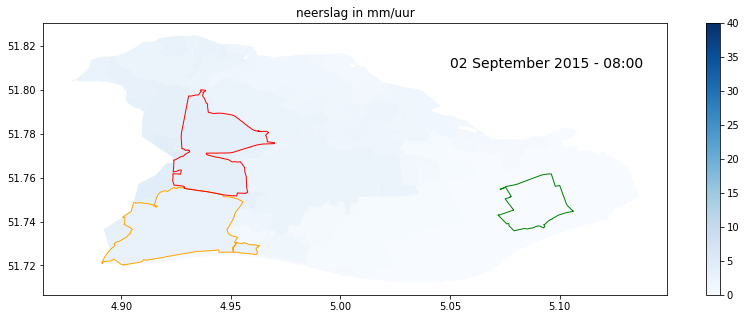

In [69]:
# plot using matplotlib
cmap = mpl.cm.Blues  # cool
norm = mpl.colors.Normalize(vmin=0, vmax=8)

# save figure to file
fig = plt.figure(figsize=(14,5))
plt.gca().set_aspect('equal')
ax = plt.gca()
feat = gdf_date_mm.plot('date_mm', vmin=0, vmax=40, ax=ax,
                        cmap=cmap, norm=norm, legend=True, )

colors_outline = ['green','orange','red']
for sel_feat in sel_gdf.iterrows(): 
    
    df_feat = pd.DataFrame(sel_feat[1]).T
    crs = {'init': 'epsg:4326'}
    gdf_feat = gpd.GeoDataFrame(df_feat, crs=crs, geometry=df_feat['geometry'])    
    gdf_feat.plot(ax=ax, color='None', edgecolor=colors_outline[sel_feat[0]])


plt.text(5.05, 51.81, df_date[0].strftime('%d %B %Y - %H:%M'), size=14)
plt.show()
#plt.savefig(os.path.join(png_out,'datum_{}.png'.format(df_date[0].strftime('%Y%m%d%H%M'))))
#plt.close(fig)

In [64]:
feat.get_legend_handles_labels()

([], [])

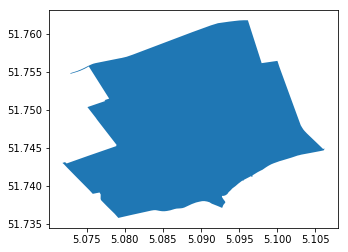

In [49]:
gdf_feat.plot()

In [ ]:
gdf.head()

In [ ]:
df_all.index.name = 'datetime'

In [ ]:
df_all.to_csv(r'D:\Projects\RO\0815.10 Data Challenge 2018\Neerslag//neerslag_mm_hr.csv')

In [ ]:
df_precip = df_all.groupby(pd.TimeGrouper('H')).sum()

In [ ]:
%matplotlib inline
df_precip['2015-08-30 18:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

In [ ]:
df_2H = df_precip.rolling(window = '2H').sum()#.shift(1)
df_2H['2015-08-30 17:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

In [ ]:
df_6H = df_precip.rolling(window = '6H').sum()#.shift(-6)
df_6H['2015-08-30 17:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

# df_2H = df_precip.resample('2H', closed='right').sum().shift(1)
# df_2H['2015-08-30 17:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

In [ ]:
df_6H.shape

In [ ]:
df_2H.shape

In [ ]:
df_precip.shape

In [ ]:
df_precip.head()

In [ ]:
df_2H.head()